In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from scipy.stats import norm, skew

### Import data

In [2]:
df_train = pd.read_csv('train.csv')
df_train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [3]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### inspect 'SalePrise'

In [5]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

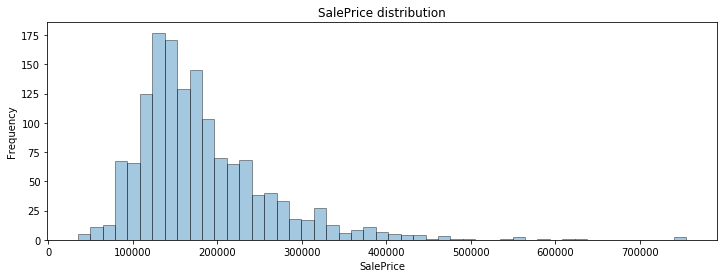

In [6]:
plt.figure(figsize = (12,4))
ax = sns.distplot(df_train['SalePrice'], hist_kws = {'edgecolor':'black'}, kde = False)
ax.set(title = 'SalePrice distribution', ylabel = 'Frequency')
plt.show()

In [7]:
print('Skewness: %f' %df_train['SalePrice'].skew())
print('Kurtosis: %f' %df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


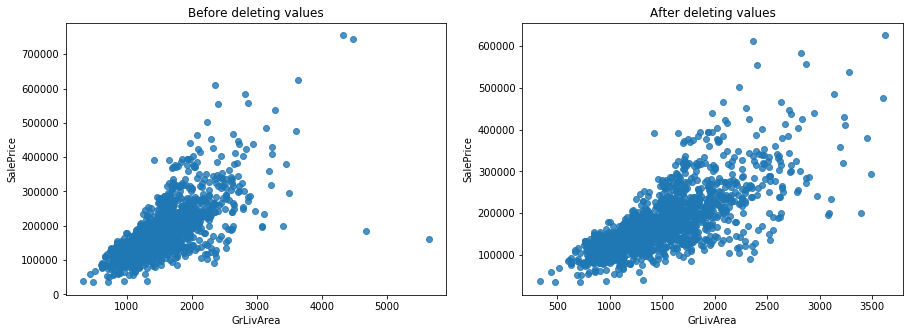

In [10]:
plt.subplots(figsize = (15,5))

plt.subplot(1,2,1)
g = sns.regplot(x= df_train['GrLivArea'], y= df_train['SalePrice'], fit_reg = False).set_title('Before deleting values')

# Delete some outliers
plt.subplot(1,2,2)
df_train = df_train.drop(df_train[df_train['GrLivArea']>4000].index)
g = sns.regplot(x=df_train['GrLivArea'], y = df_train['SalePrice'], fit_reg = False).set_title('After deleting values')

### Correlation Matrix

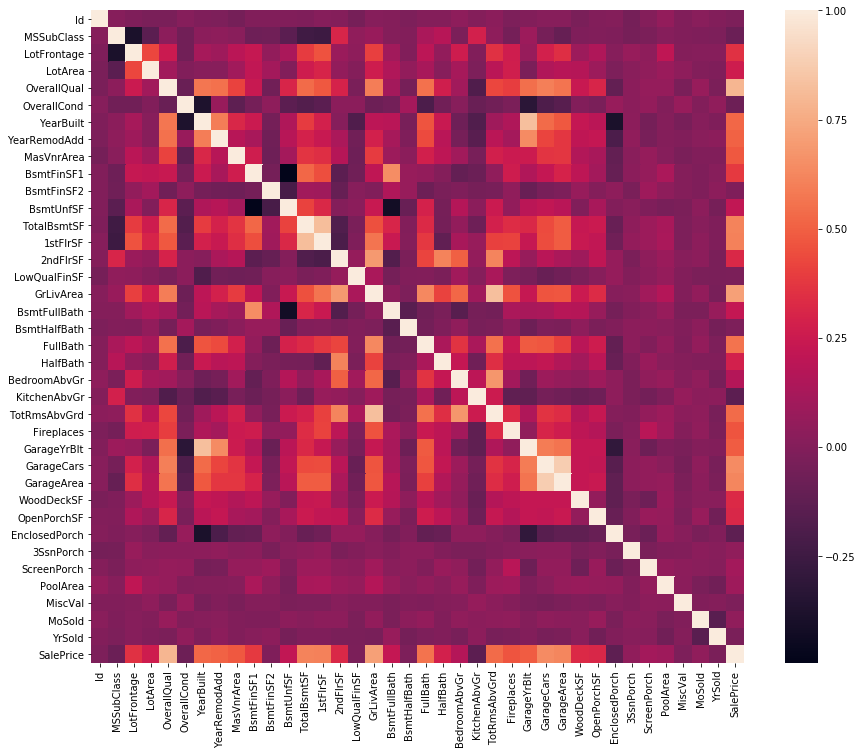

In [42]:
plt.figure(figsize = (15,12))
sns.heatmap(df_train.corr(), vmax = 1, square = True)

# TotalBsmtSF and 1stFlrSG - multicollinearity. GarageX columns - multicollinearity
# SalePrice corellat with 'GrLivArea', 'TotalBsmtSF' and 'OverallQual' very well. And with some more variables.

### 'SalePrice' correlation matrix (zoomed heatmap style)

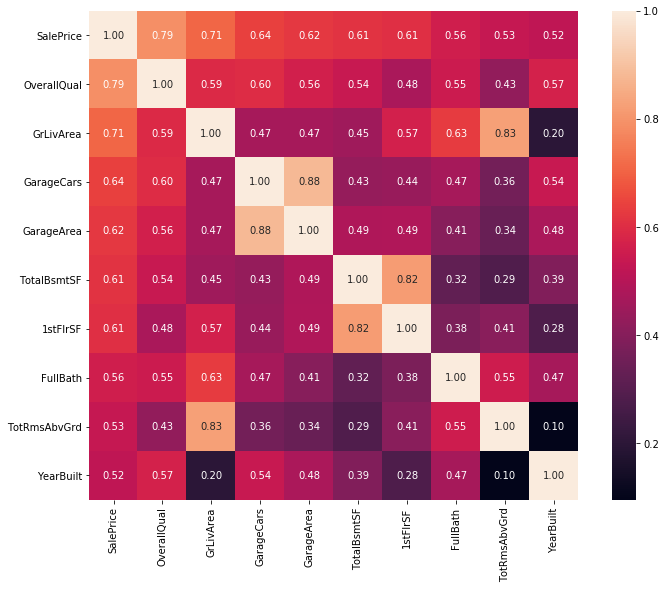

In [47]:
k=10
cols = df_train.corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)

plt.figure(figsize = (12,9))
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# 'GarageCars' and 'GarageArea'  - left only 'GarageCars'
# 'TotalBsmtSF' and '1stFloor' - left 'TotalBsmtSF'
# 'TotRmsAbvGrd' and 'GrLivArea' left 'GrLivArea'

### Scatterplots between SalePrice and most collelated variables

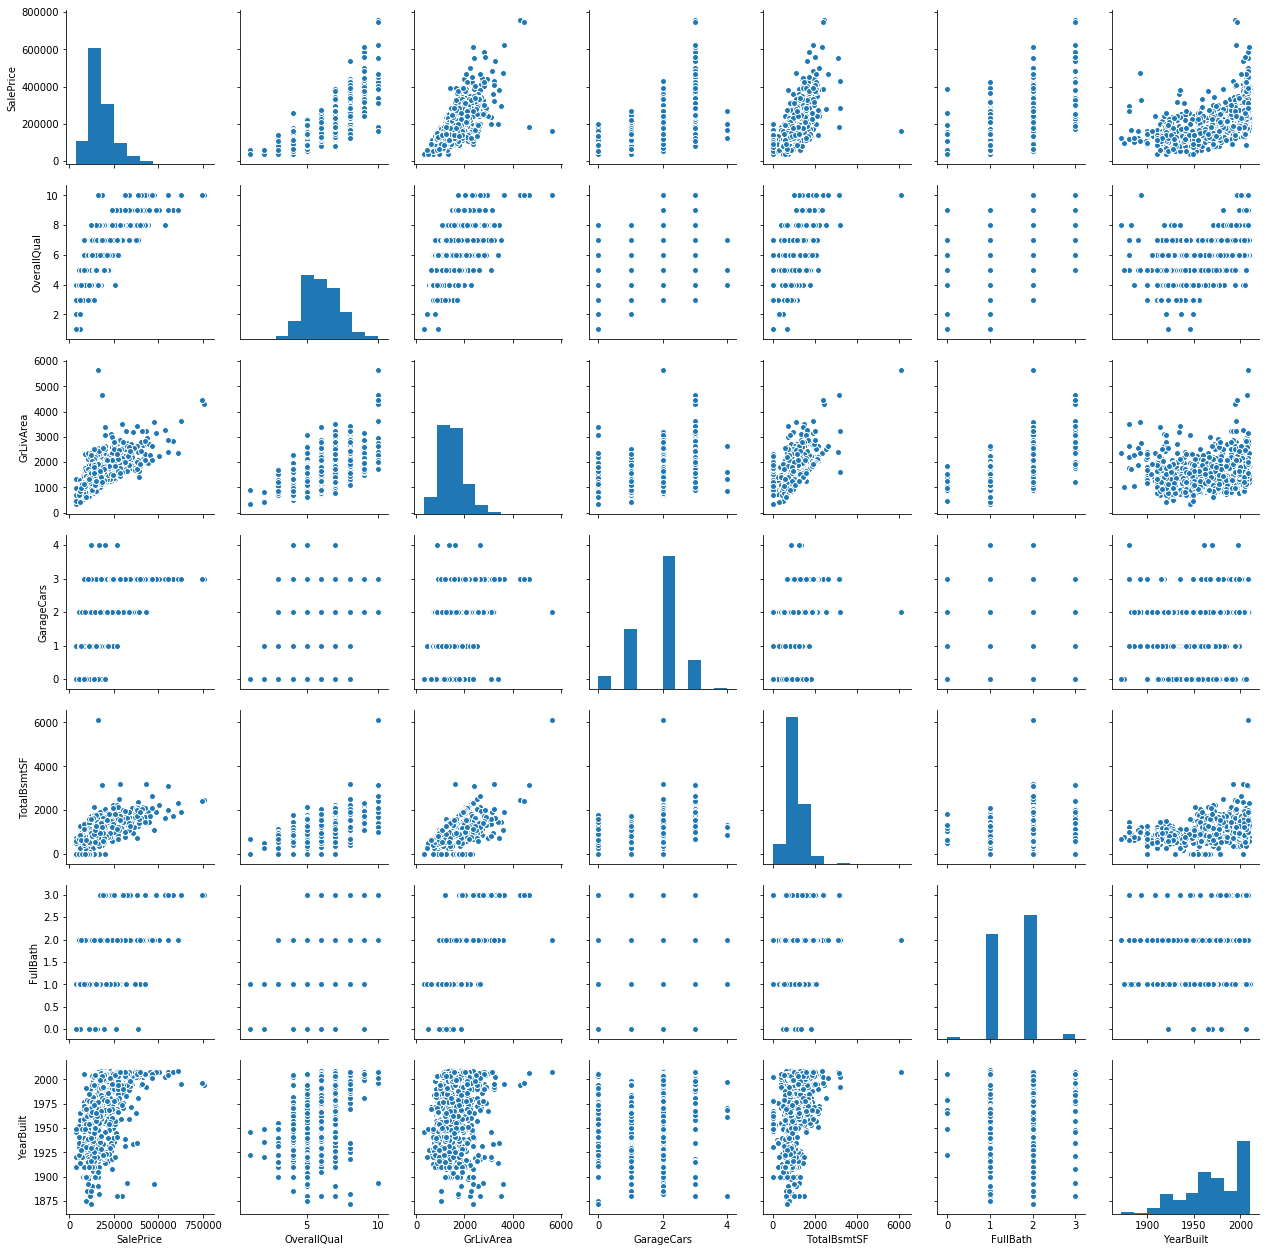

In [49]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show()

### Missing Data

In [72]:
total = df_train.isnull().sum()
percent = (df_train.isnull().sum()/len(df_train))*100

missing_data = pd.concat([total,percent], axis = 1, keys = ['Total','Percent']).sort_values(by = 'Total', ascending = False).reset_index()

missing_data.head(20)

,index,Total,Percent
0,PoolQC,1453,99.520548
1,MiscFeature,1406,96.301370
2,Alley,1369,93.767123
3,Fence,1179,80.753425
4,FireplaceQu,690,47.260274
5,LotFrontage,259,17.739726
6,GarageYrBlt,81,5.547945
7,GarageCond,81,5.547945
8,GarageType,81,5.547945
9,GarageFinish,81,5.547945


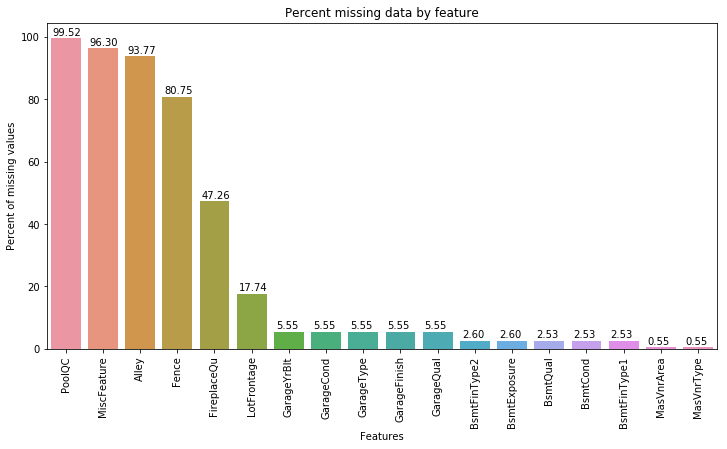

In [90]:
plt.figure(figsize = (12,6))
plt.xticks(rotation = 90)
ax = sns.barplot(x = 'index', y = 'Percent', data = missing_data.iloc[0:18])
ax.set(title = 'Percent missing data by feature', xlabel = 'Features', ylabel = 'Percent of missing values')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0.05,height+1, '%.2f'%(height))

### Imputing missing Data

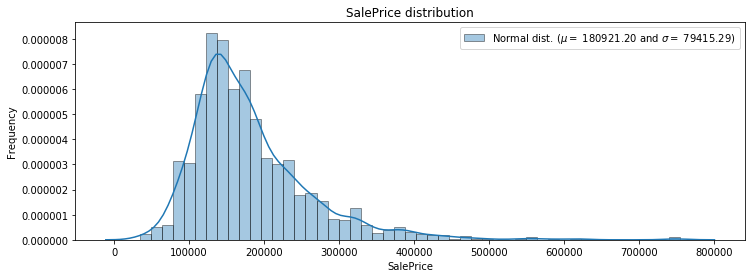

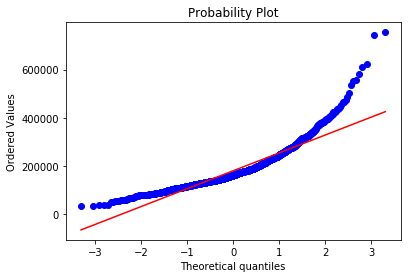

In [50]:
(mu, sigma) = norm.fit(df_train['SalePrice'])

plt.figure(figsize = (12,4))
ax = sns.distplot(df_train['SalePrice'], hist_kws = {'edgecolor':'black'})
ax.set(title = 'SalePrice distribution', ylabel = 'Frequency')
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu, sigma)],
            loc='best')

plt.show()

stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()